# The Google Search Index

A free tool which can be used to measure interest in companies based on search volume is the google search index. By utilizing this index, we can review trends in searches to compare the overall time trend as well as any components of seasonality. An important thing to note is that these are all relative values. When we go to compare multiple searches, the values are normalized to be within a range of 0-100 relative to one and other (the terms) and the months that we are analyzing. Our first step, as always, is reading in and cleaning the data.

In [1]:
import pandas as pd

#Read the data
df = pd.read_csv("AirbnbSearch.csv", index_col=0)

print(df)

        Airbnb  Vrbo HomeAway Booking.com
Month                                    
2004-01      0     1        0           0
2004-02      0     1        0           0
2004-03      0     1        0           0
2004-04      0     2        0           0
2004-05      0     2        0           0
...        ...   ...      ...         ...
2020-08     90    33        2           4
2020-09     73    27        1           3
2020-10     62    22        1           3
2020-11     53    17        1           2
2020-12     95    18        1           2

[204 rows x 4 columns]


Something you may notice is that certain days are not proper numbers, but instead represented as "<1" as a string. Below we see an example of this.

In [2]:
print(df.loc['2010-01-01':])

        Airbnb  Vrbo HomeAway Booking.com
Month                                    
2010-02     <1    12        2           1
2010-03     <1    12        2           1
2010-04     <1    11        1           1
2010-05     <1    11        1           2
2010-06     <1    14        2           2
...        ...   ...      ...         ...
2020-08     90    33        2           4
2020-09     73    27        1           3
2020-10     62    22        1           3
2020-11     53    17        1           2
2020-12     95    18        1           2

[131 rows x 4 columns]


By using applymap, we apply a function to each cell within the dataframe. The problem with this data is that we are dealing with integers as well as strings so if we try to apply a function for a string to an integer we will end up causing an error. To fix this, we can create a lambda function where we use if and else. The way to do this is to write a statement as "A if X else B" where A and B are the pieces of code to execute and X is the condition to decide which we execute. Below, we will replace "<1" with ".5" and then convert to a floating point number in the case that the type of the cell is a string, otherwise we just return the value because it is numerical.

In [3]:
#Convert <1 to be .5
df = df.applymap(lambda x: float(x.replace("<1", ".5")) if type(x) == str else x)
print(df)

         Airbnb  Vrbo  HomeAway  Booking.com
Month                                       
2004-01     0.0     1       0.0          0.0
2004-02     0.0     1       0.0          0.0
2004-03     0.0     1       0.0          0.0
2004-04     0.0     2       0.0          0.0
2004-05     0.0     2       0.0          0.0
...         ...   ...       ...          ...
2020-08    90.0    33       2.0          4.0
2020-09    73.0    27       1.0          3.0
2020-10    62.0    22       1.0          3.0
2020-11    53.0    17       1.0          2.0
2020-12    95.0    18       1.0          2.0

[204 rows x 4 columns]


Another modification we need to do is to convert the index of this dataframe to be a datetime object instead of a string.

In [4]:
df.index = pd.to_datetime(df.index)
print(df)

            Airbnb  Vrbo  HomeAway  Booking.com
Month                                          
2004-01-01     0.0     1       0.0          0.0
2004-02-01     0.0     1       0.0          0.0
2004-03-01     0.0     1       0.0          0.0
2004-04-01     0.0     2       0.0          0.0
2004-05-01     0.0     2       0.0          0.0
...            ...   ...       ...          ...
2020-08-01    90.0    33       2.0          4.0
2020-09-01    73.0    27       1.0          3.0
2020-10-01    62.0    22       1.0          3.0
2020-11-01    53.0    17       1.0          2.0
2020-12-01    95.0    18       1.0          2.0

[204 rows x 4 columns]


We will also want to see what the data actually looks like. Because we are using a dataframe it is relatively easy to just plot this result.

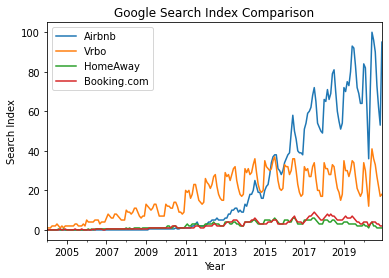

In [5]:
import matplotlib.pyplot as plt

#Plot the data
ax = df.plot(kind='line')
ax.set_xlabel("Year")
ax.set_ylabel("Search Index")
ax.set_title("Google Search Index Comparison")
plt.show()

## Plotting Yearly Data

We might want to zoom into specific years to get a closer look because it appears that there may be seasonality. To do this we will rely on two functionalities of pandas that make this effecient and easy. First, we can easily pull the year from a datetime index by calling its year attribute like below:

In [6]:
print(df.index.year)

Int64Index([2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004, 2004,
            ...
            2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020, 2020],
           dtype='int64', name='Month', length=204)


With this, we can find a boolean index of whether or not a year matches a given value and use that to find our yearly data. First, let's see what the index looks like for matching the year 2020, then how it can be used to return just values within the year 2020.

In [7]:
#Match years in 2020
i = df.index.year == 2020
print(i)
print()

#Return the data that matches this condition
print(df[i])

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

Now, iterate through the years 2015-2020 to get a deeper understanding.

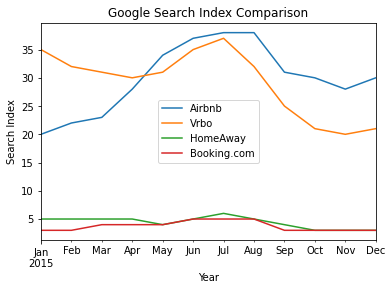

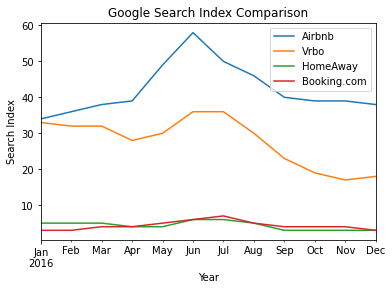

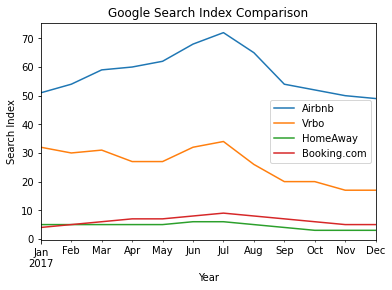

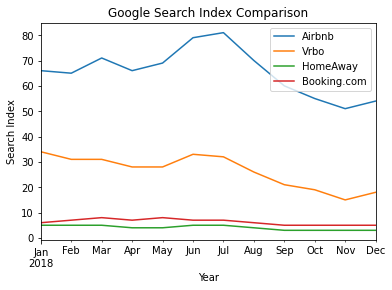

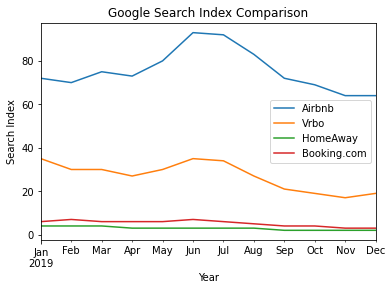

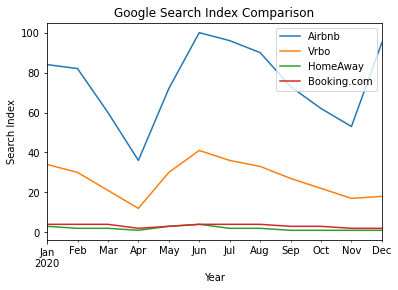

In [8]:
for year in range(2015, 2021):
    #Get the data for that year only
    yearly_data = df[df.index.year == year]
    ax = yearly_data.plot(kind='line')
    ax.set_xlabel("Year")
    ax.set_ylabel("Search Index")
    ax.set_title("Google Search Index Comparison")
    plt.show()

## Zooming in on Airbnb

To get a clearer picture of the trend and seasonality of airbnb, we will first observe its last 6 years. Indexing to the all dates including and after 1/1/2015 and resting the end is the first task to do.

In [9]:
#Get our sample data
airbnb = df.loc['2015-01-01':]['Airbnb'].reset_index()
airbnb.columns = ['Date', 'Search']
print(airbnb)

         Date  Search
0  2015-01-01    20.0
1  2015-02-01    22.0
2  2015-03-01    23.0
3  2015-04-01    28.0
4  2015-05-01    34.0
..        ...     ...
67 2020-08-01    90.0
68 2020-09-01    73.0
69 2020-10-01    62.0
70 2020-11-01    53.0
71 2020-12-01    95.0

[72 rows x 2 columns]


For columns of the datetime type, we can use dt followed by a part of the date we want to return things like the year for each date, the month of each date, etc.

In [10]:
airbnb['Year'] = airbnb['Date'].dt.year
airbnb['Month'] = airbnb['Date'].dt.month
print(airbnb)

         Date  Search  Year  Month
0  2015-01-01    20.0  2015      1
1  2015-02-01    22.0  2015      2
2  2015-03-01    23.0  2015      3
3  2015-04-01    28.0  2015      4
4  2015-05-01    34.0  2015      5
..        ...     ...   ...    ...
67 2020-08-01    90.0  2020      8
68 2020-09-01    73.0  2020      9
69 2020-10-01    62.0  2020     10
70 2020-11-01    53.0  2020     11
71 2020-12-01    95.0  2020     12

[72 rows x 4 columns]


In [11]:
#Pivot the date by month and year
airbnb = airbnb.pivot('Month', 'Year', 'Search')
print(airbnb)

Year   2015  2016  2017  2018  2019   2020
Month                                     
1      20.0  34.0  51.0  66.0  72.0   84.0
2      22.0  36.0  54.0  65.0  70.0   82.0
3      23.0  38.0  59.0  71.0  75.0   60.0
4      28.0  39.0  60.0  66.0  73.0   36.0
5      34.0  49.0  62.0  69.0  80.0   72.0
6      37.0  58.0  68.0  79.0  93.0  100.0
7      38.0  50.0  72.0  81.0  92.0   96.0
8      38.0  46.0  65.0  70.0  83.0   90.0
9      31.0  40.0  54.0  60.0  72.0   73.0
10     30.0  39.0  52.0  55.0  69.0   62.0
11     28.0  39.0  50.0  51.0  64.0   53.0
12     30.0  38.0  49.0  54.0  64.0   95.0


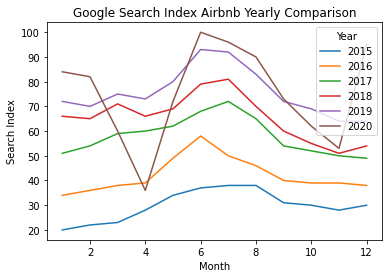

In [12]:
#Plot the data
ax = airbnb.plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("Search Index")
ax.set_title("Google Search Index Airbnb Yearly Comparison")
plt.show()

## The Impact of Outliers

Outliers within our data can skew our results, especially if they come from extreme circumstances that we do not believe represent the normal state of the data. For airbnb, it is quite obvious that 2020 has a lot of differences from all the other years. Two major events are changing the data to an extreme extent: the coronavirus pandemic which drives down the searches sharply around the spring, as well as the IPO of airbnb which drove up the searches towards the end of 2020. While we don't want to throw out data without a good reason, in the case of 2020, it is justifiable to ignore that data.

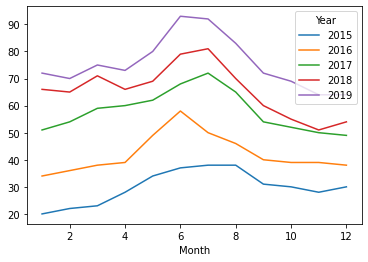

In [13]:
#Drop 2020
airbnb = airbnb.drop(columns=[2020])
airbnb.plot(kind='line')
plt.show()

### Predicting the Trend and Seasonality

Now that we have a picture of those last 6 years, let's change the sample and to now be all data between 2012 and 2019.

In [14]:
airbnb = df.loc['2012-01-01':'2019-12-31']['Airbnb'].reset_index()
airbnb.columns = ['Date', 'Search']
airbnb['Year'] = airbnb['Date'].dt.year
airbnb['Month'] = airbnb['Date'].dt.month
airbnb = airbnb.pivot('Month', 'Year', 'Search')
print(airbnb)

Year   2012  2013  2014  2015  2016  2017  2018  2019
Month                                                
1       2.0   6.0  13.0  20.0  34.0  51.0  66.0  72.0
2       3.0   6.0  12.0  22.0  36.0  54.0  65.0  70.0
3       4.0   8.0  15.0  23.0  38.0  59.0  71.0  75.0
4       4.0   8.0  18.0  28.0  39.0  60.0  66.0  73.0
5       5.0  10.0  18.0  34.0  49.0  62.0  69.0  80.0
6       5.0  10.0  20.0  37.0  58.0  68.0  79.0  93.0
7       5.0  11.0  25.0  38.0  50.0  72.0  81.0  92.0
8       6.0  11.0  22.0  38.0  46.0  65.0  70.0  83.0
9       5.0   9.0  19.0  31.0  40.0  54.0  60.0  72.0
10      5.0  10.0  19.0  30.0  39.0  52.0  55.0  69.0
11      5.0   9.0  16.0  28.0  39.0  50.0  51.0  64.0
12      5.0   9.0  16.0  30.0  38.0  49.0  54.0  64.0


If we get the mean value for all years, a very obvious linear trend over time becomes quite apparent.

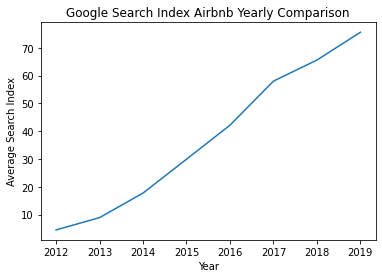

In [15]:
ax = airbnb.mean().plot(kind='line')
ax.set_xlabel("Year")
ax.set_ylabel("Average Search Index")
ax.set_title("Google Search Index Airbnb Yearly Comparison")
plt.show()

### Normalizing Yearly Data

If we wanted to compare year by year different aspects of seasonality, we would want to first control for those huge trend over time. This will make it easier to compare on a relative basis. If we divide each column by the sum of the column we can get the percent of the search index that each month took up of the total search for a given year.

In [16]:
airbnb2 = airbnb.divide(airbnb.sum())
print(airbnb2)

Year       2012      2013      2014      2015      2016      2017      2018  \
Month                                                                         
1      0.037037  0.056075  0.061033  0.055710  0.067194  0.073276  0.083863   
2      0.055556  0.056075  0.056338  0.061281  0.071146  0.077586  0.082592   
3      0.074074  0.074766  0.070423  0.064067  0.075099  0.084770  0.090216   
4      0.074074  0.074766  0.084507  0.077994  0.077075  0.086207  0.083863   
5      0.092593  0.093458  0.084507  0.094708  0.096838  0.089080  0.087675   
6      0.092593  0.093458  0.093897  0.103064  0.114625  0.097701  0.100381   
7      0.092593  0.102804  0.117371  0.105850  0.098814  0.103448  0.102922   
8      0.111111  0.102804  0.103286  0.105850  0.090909  0.093391  0.088945   
9      0.092593  0.084112  0.089202  0.086351  0.079051  0.077586  0.076239   
10     0.092593  0.093458  0.089202  0.083565  0.077075  0.074713  0.069886   
11     0.092593  0.084112  0.075117  0.077994  0.077

As an easy confirmation that we did this correctly, we can check to make sure that the sum of each year is 1, meaning every month is correctly a proportion of the overall yearly search volume.

In [17]:
print(airbnb2.sum())

Year
2012    1.0
2013    1.0
2014    1.0
2015    1.0
2016    1.0
2017    1.0
2018    1.0
2019    1.0
dtype: float64


After we have controlled for the overall yearly search volume, once again we can draw some sharp insights. Now, we see that around summer months is always a peak of the shares which makes intuitive sense.

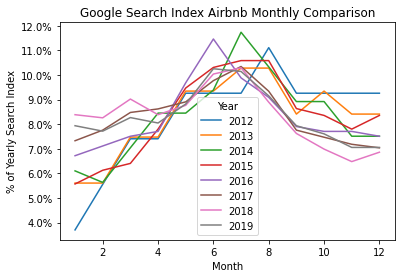

In [18]:
from matplotlib.ticker import PercentFormatter

ax = airbnb2.plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("% of Yearly Search Index")
ax.set_title("Google Search Index Airbnb Monthly Comparison")
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

The mean across rows will provide a picture of the average for seasonality. It illustrates the overall pattern.

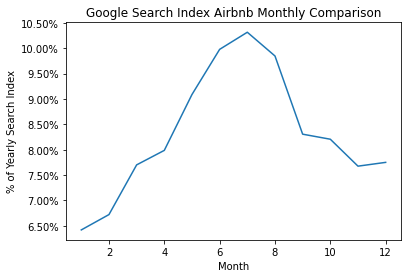

In [19]:
ax = airbnb2.mean(axis=1).plot(kind='line')
ax.set_xlabel("Month")
ax.set_ylabel("% of Yearly Search Index")
ax.set_title("Google Search Index Airbnb Monthly Comparison")
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

### Mapping

The idea of mapping, taking one set of values and transferring it to another set of values based on some function or translation dictionary, is important for what we are going to do next. Instead of just simply looking at months, we want to map each month to the season it is in, and then from there see what the seasonality might look like. We call the function map on our index, and pass a dictionary denoting what value each key sould get. The output is the season associated with each index.

In [20]:
#An example of how it works
print(airbnb2.index.map({1: 'Winter',
                  2: 'Winter',
                  3: 'Spring',
                  4: 'Spring',
                  5: 'Spring',
                  6: 'Summer', 
                  7: 'Summer',
                  8: 'Summer',
                  9: 'Fall',
                  10: 'Fall',
                  11: 'Fall',
                  12: 'Winter'}))

Index(['Winter', 'Winter', 'Spring', 'Spring', 'Spring', 'Summer', 'Summer',
       'Summer', 'Fall', 'Fall', 'Fall', 'Winter'],
      dtype='object', name='Month')


In [21]:
#Change the index to be the mapped version
airbnb2.index = airbnb2.index.map({1: 'Winter',
                  2: 'Winter',
                  3: 'Spring',
                  4: 'Spring',
                  5: 'Spring',
                  6: 'Summer', 
                  7: 'Summer',
                  8: 'Summer',
                  9: 'Fall',
                  10: 'Fall',
                  11: 'Fall',
                  12: 'Winter'})
print(airbnb2)

Year        2012      2013      2014      2015      2016      2017      2018  \
Month                                                                          
Winter  0.037037  0.056075  0.061033  0.055710  0.067194  0.073276  0.083863   
Winter  0.055556  0.056075  0.056338  0.061281  0.071146  0.077586  0.082592   
Spring  0.074074  0.074766  0.070423  0.064067  0.075099  0.084770  0.090216   
Spring  0.074074  0.074766  0.084507  0.077994  0.077075  0.086207  0.083863   
Spring  0.092593  0.093458  0.084507  0.094708  0.096838  0.089080  0.087675   
Summer  0.092593  0.093458  0.093897  0.103064  0.114625  0.097701  0.100381   
Summer  0.092593  0.102804  0.117371  0.105850  0.098814  0.103448  0.102922   
Summer  0.111111  0.102804  0.103286  0.105850  0.090909  0.093391  0.088945   
Fall    0.092593  0.084112  0.089202  0.086351  0.079051  0.077586  0.076239   
Fall    0.092593  0.093458  0.089202  0.083565  0.077075  0.074713  0.069886   
Fall    0.092593  0.084112  0.075117  0.

In [22]:
#Use groupby and sum to aggregate all the values for each season and year
airbnb2 = airbnb2.groupby(airbnb2.index).sum()
print(airbnb2)

Year        2012      2013      2014      2015      2016      2017      2018  \
Month                                                                          
Fall    0.277778  0.261682  0.253521  0.247911  0.233202  0.224138  0.210928   
Spring  0.240741  0.242991  0.239437  0.236769  0.249012  0.260057  0.261753   
Summer  0.296296  0.299065  0.314554  0.314763  0.304348  0.294540  0.292249   
Winter  0.185185  0.196262  0.192488  0.200557  0.213439  0.221264  0.235070   

Year        2019  
Month             
Fall    0.226020  
Spring  0.251378  
Summer  0.295480  
Winter  0.227122  


Also, let's re-arrange the index so that it starts with winter.

In [23]:
airbnb2 = airbnb2.reindex(index=['Winter', 'Spring', 'Summer', 'Fall'])
print(airbnb2)

Year        2012      2013      2014      2015      2016      2017      2018  \
Month                                                                          
Winter  0.185185  0.196262  0.192488  0.200557  0.213439  0.221264  0.235070   
Spring  0.240741  0.242991  0.239437  0.236769  0.249012  0.260057  0.261753   
Summer  0.296296  0.299065  0.314554  0.314763  0.304348  0.294540  0.292249   
Fall    0.277778  0.261682  0.253521  0.247911  0.233202  0.224138  0.210928   

Year        2019  
Month             
Winter  0.227122  
Spring  0.251378  
Summer  0.295480  
Fall    0.226020  


/Users/seanmcowen/anaconda/envs/FinanceAndPython/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


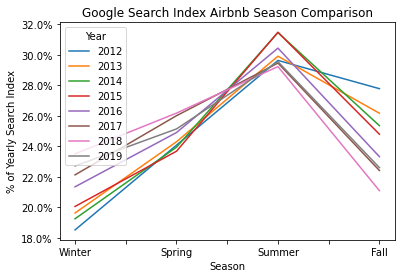

In [24]:
ax = airbnb2.plot(kind='line')
ax.set_xlabel("Season")
ax.set_ylabel("% of Yearly Search Index")
ax.set_title("Google Search Index Airbnb Season Comparison")
ax.yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# Regression Modeling

We are going to model the search index time series in two dimensions, the trend over time, and the seasonality. Our exploratory analysis conducted prior showed that there is great promise for this approach. To begin, create our data sample again between 2012 to 2019 for airbnb, and let's have columns for the year, month and season.

In [25]:
#Get the sample data
airbnb = df.loc['2012-01-01':'2019-12-31']['Airbnb'].reset_index()
airbnb.columns = ['Date', 'Search']

#Create the columns for year, month and season
airbnb['Year'] = airbnb['Date'].dt.year
airbnb['Month'] = airbnb['Date'].dt.month
airbnb['Season'] = airbnb['Month'].map({1: 'Winter',
                  2: 'Winter',
                  3: 'Spring',
                  4: 'Spring',
                  5: 'Spring',
                  6: 'Summer', 
                  7: 'Summer',
                  8: 'Summer',
                  9: 'Fall',
                  10: 'Fall',
                  11: 'Fall',
                  12: 'Winter'})
print(airbnb)

         Date  Search  Year  Month  Season
0  2012-01-01     2.0  2012      1  Winter
1  2012-02-01     3.0  2012      2  Winter
2  2012-03-01     4.0  2012      3  Spring
3  2012-04-01     4.0  2012      4  Spring
4  2012-05-01     5.0  2012      5  Spring
..        ...     ...   ...    ...     ...
91 2019-08-01    83.0  2019      8  Summer
92 2019-09-01    72.0  2019      9    Fall
93 2019-10-01    69.0  2019     10    Fall
94 2019-11-01    64.0  2019     11    Fall
95 2019-12-01    64.0  2019     12  Winter

[96 rows x 5 columns]


## A Very Brief Introduction to Linear Regression

Linear regression is a very basic modeling tool that models the linear relationship between a group of variables and a response variable. Because this course is not one on econometrics, we will not cover linear regression in depth. If you have no experience with it then the following resource will be helpful for learning: 

If you do not have the background and also do not decide to read into linear regression, you just want to know the following to understand the rest of the lecture. Given a set of coeffecients and a set of variables, linear regression predicts the response variable as the summation of each coeffecient multiplied by the variable. 

## Dummy Variables



Dummy variables are a way to represent numerically whether or not something is true for a given observation. If we have 4 categorical variables for season (Fall, Spring, Summer, Winter), then we can represent them as 4 dummy variables testing whether or not each instance is in a given season. The pandas function get_dummies returns to us columns for all present categorical variables and 0 or 1 to denote whether it is either true or false.

In [26]:
#Get the dummy variables
print(pd.get_dummies(airbnb['Season']))

    Fall  Spring  Summer  Winter
0      0       0       0       1
1      0       0       0       1
2      0       1       0       0
3      0       1       0       0
4      0       1       0       0
..   ...     ...     ...     ...
91     0       0       1       0
92     1       0       0       0
93     1       0       0       0
94     1       0       0       0
95     0       0       0       1

[96 rows x 4 columns]


### The Base Case

When we model out data, we need to have a base case to compare to because otherwise it is redundant. If we know that a date is not in Fall, Spring, or Summer, then it must be in winter! For our modeling purposes we then want to leave out winter as a dummy variable and consider it the base case. Below, we drop the winter dummy variable then join the airbnb data and dummy variable data.

In [27]:
airbnb = airbnb.join(pd.get_dummies(airbnb['Season']).drop(columns=['Winter']))
print(airbnb)

         Date  Search  Year  Month  Season  Fall  Spring  Summer
0  2012-01-01     2.0  2012      1  Winter     0       0       0
1  2012-02-01     3.0  2012      2  Winter     0       0       0
2  2012-03-01     4.0  2012      3  Spring     0       1       0
3  2012-04-01     4.0  2012      4  Spring     0       1       0
4  2012-05-01     5.0  2012      5  Spring     0       1       0
..        ...     ...   ...    ...     ...   ...     ...     ...
91 2019-08-01    83.0  2019      8  Summer     0       0       1
92 2019-09-01    72.0  2019      9    Fall     1       0       0
93 2019-10-01    69.0  2019     10    Fall     1       0       0
94 2019-11-01    64.0  2019     11    Fall     1       0       0
95 2019-12-01    64.0  2019     12  Winter     0       0       0

[96 rows x 8 columns]


### Trend Component

As for the trend component, we saw that there is a linear trend over time for the overall search index. Because of this, we want a linear variable of time to describe how far along in time we are. If we take T=1 to be the first month 1/1/2012, then add 1 to this variable for each month, we will create a linear trend variable to be used in modeling.

In [28]:
#Create the trend component
airbnb['T'] = (airbnb['Year'] - 2012) * 12 + airbnb['Month']
print(airbnb)

         Date  Search  Year  Month  Season  Fall  Spring  Summer   T
0  2012-01-01     2.0  2012      1  Winter     0       0       0   1
1  2012-02-01     3.0  2012      2  Winter     0       0       0   2
2  2012-03-01     4.0  2012      3  Spring     0       1       0   3
3  2012-04-01     4.0  2012      4  Spring     0       1       0   4
4  2012-05-01     5.0  2012      5  Spring     0       1       0   5
..        ...     ...   ...    ...     ...   ...     ...     ...  ..
91 2019-08-01    83.0  2019      8  Summer     0       0       1  92
92 2019-09-01    72.0  2019      9    Fall     1       0       0  93
93 2019-10-01    69.0  2019     10    Fall     1       0       0  94
94 2019-11-01    64.0  2019     11    Fall     1       0       0  95
95 2019-12-01    64.0  2019     12  Winter     0       0       0  96

[96 rows x 9 columns]


Finally, we also need a constant like usual.

In [29]:
airbnb['Constant'] = 1
print(airbnb)

         Date  Search  Year  Month  Season  Fall  Spring  Summer   T  Constant
0  2012-01-01     2.0  2012      1  Winter     0       0       0   1         1
1  2012-02-01     3.0  2012      2  Winter     0       0       0   2         1
2  2012-03-01     4.0  2012      3  Spring     0       1       0   3         1
3  2012-04-01     4.0  2012      4  Spring     0       1       0   4         1
4  2012-05-01     5.0  2012      5  Spring     0       1       0   5         1
..        ...     ...   ...    ...     ...   ...     ...     ...  ..       ...
91 2019-08-01    83.0  2019      8  Summer     0       0       1  92         1
92 2019-09-01    72.0  2019      9    Fall     1       0       0  93         1
93 2019-10-01    69.0  2019     10    Fall     1       0       0  94         1
94 2019-11-01    64.0  2019     11    Fall     1       0       0  95         1
95 2019-12-01    64.0  2019     12  Winter     0       0       0  96         1

[96 rows x 10 columns]


Set the date as the index.

In [30]:
#Set the index
airbnb = airbnb.set_index('Date')

We can run a regression model by using statsmodels. We need our X variables and the Y variable we are predicting first of all. Then we create an OLS object passing in Y and X, and fit the model. After fitting the model we can get a print out.

In [31]:
import statsmodels.api as sm

#Fit the model
Y = airbnb['Search']
X = airbnb[['Fall', 'Spring', 'Summer', 'T', 'Constant']]
model = sm.OLS(Y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Search   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     460.0
Date:                Wed, 06 Oct 2021   Prob (F-statistic):           1.90e-59
Time:                        00:10:30   Log-Likelihood:                -301.82
No. Observations:                  96   AIC:                             613.6
Df Residuals:                      91   BIC:                             626.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Fall          -3.0751      1.668     -1.844      0.0

The coefficients confirm what we saw graphically, that there are strong seasonality and trend components. We can grab the fitted values created from this model quite easily.

In [32]:
#Get the fitted values
predicted = model.fittedvalues
print(predicted)

Date
2012-01-01    -8.116022
2012-02-01    -7.217666
2012-03-01    -0.462622
2012-04-01     0.435734
2012-05-01     1.334089
                ...    
2019-08-01    83.837622
2019-09-01    71.457578
2019-10-01    72.355933
2019-11-01    73.254289
2019-12-01    77.227755
Length: 96, dtype: float64


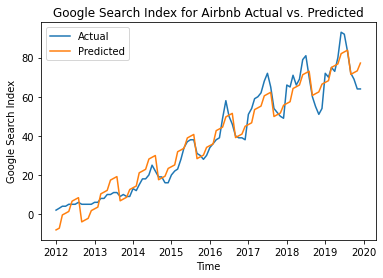

In [33]:
#Plot the results
plt.plot(airbnb.index, airbnb['Search'])
plt.plot(predicted.index, predicted.values)
plt.xlabel("Time")
plt.ylabel("Google Search Index")
plt.title("Google Search Index for Airbnb Actual vs. Predicted")
plt.legend(['Actual', 'Predicted'])
plt.show()

## Multiplicative Seasonal Decomposition

Another way to smooth out the data to find insights is to use a decomposition which takes a series and forms predictions based off of the following model:

$ Y_{i} = T_{i} * S_{i} * \epsilon_{i} $

where 

$ Y_{i} = \text{Series Value at time i} $

$ T_{i} = \text{Trend Value at time i} $

$ S_{i} = \text{Seasonal Value at time i} $

$ \epsilon_{i} = \text{Error Value at time i} $


We will work through how each piece (the trend and the seasonal effect) are found after first using an already created version of seasonal decomposition. The seasonal_decompose function within statsmodels takes a series of data to decompose and as well can optionally take the model (in this case we use multiplicative) as well as the period (in this case we use 12 because we want to see monthly effects. Finally, we can use the plot() function on the object we get back to plot the trend and seasonality.

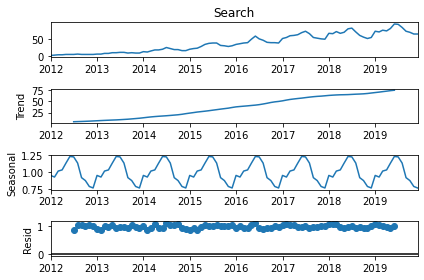

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
Y = airbnb['Search']

#Run the decomposition
result = seasonal_decompose(Y, model='multiplicative', period=12)

#Plot the decomposition
result.plot()
plt.show()

## Computing the Trend Component

For this first version of the seasonal_decompose, a moving average is used based on the period. If the period is odd, then the moving average is equal to a simple average around the point $Y_{t}$. First, to clean up the formula let's define a variable B for the lower/upper bound as:

$B = \frac{P-1}{2}$

$T_{t} = \frac{Y_{t-B} + Y_{t-B+1}+...+Y_{t}+...+Y_{t+B-1}+Y_{t+B}}{P} $

If the period is even, then we need to change this so that we have P+1 data points and the two on the end are each weighted to be only half. So the equation would be (notice the .5 multiplied on the end values):

$B = \frac{P}{2}$

$T_{t} = \frac{.5 * Y_{t-B} + Y_{t-B+1}+...+Y_{t}+...+Y_{t+B-1}+.5*Y_{t+B}}{P} $


In [35]:
#Print out the trend values for the decomposition
print(result.trend.dropna())

#Compute the trend component based on period of 12 to check
trend = sum([Y.shift(x) for x in range(-5, 6)]) + Y.shift(-6) * .5 + Y.shift(6) * .5
trend = trend / 12
print(trend.dropna())

Date
2012-07-01     4.666667
2012-08-01     4.958333
2012-09-01     5.250000
2012-10-01     5.583333
2012-11-01     5.958333
                ...    
2019-02-01    70.958333
2019-03-01    72.000000
2019-04-01    73.083333
2019-05-01    74.208333
2019-06-01    75.166667
Name: trend, Length: 84, dtype: float64
Date
2012-07-01     4.666667
2012-08-01     4.958333
2012-09-01     5.250000
2012-10-01     5.583333
2012-11-01     5.958333
                ...    
2019-02-01    70.958333
2019-03-01    72.000000
2019-04-01    73.083333
2019-05-01    74.208333
2019-06-01    75.166667
Name: Search, Length: 84, dtype: float64


## Computing the Seasonal Component

The seasonal component is found by grouping each season (in this case the month) and finding the average of the value divided by the trend, and finally dividing these numbers by the average. We will skip the math to go straight into showing it since it will be easier to understand.

For each given season, we need to find the average of the value divided by trend. Using january as an example, let's work step by step through it. First, create the de-trended data. This is done by dividing each value by its trend.

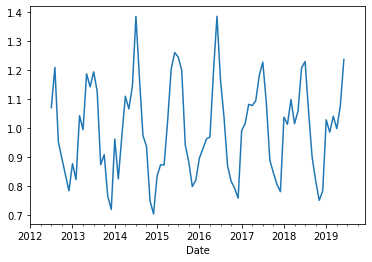

In [36]:
Y_detrended = Y / trend
Y_detrended.plot(kind='line')
plt.show()

Now for january, we need to find each value which falls in that month. Because it is the first value in the dataframe, and we know it repeats every 12 times, we can do this....

In [37]:
print(Y_detrended.iloc[::12])

Date
2012-01-01         NaN
2013-01-01    0.878049
2014-01-01    0.962963
2015-01-01    0.834783
2016-01-01    0.896703
2017-01-01    0.991896
2018-01-01    1.038689
2019-01-01    1.029184
Name: Search, dtype: float64


Take the mean of these numbers.

In [38]:
print(Y_detrended.iloc[::12].mean())

0.9474666405490085


Generalize this to be every month now by using list comprehension and changing the starting index for each but keeping that same 12 period repeat. 

In [39]:
import numpy as np
seasonal = np.array([Y_detrended.iloc[i::12].mean() for i in range(12)])
print(seasonal)

[0.94746664 0.92398382 1.01092864 1.02782975 1.12638624 1.22338223
 1.21746959 1.12768306 0.91495187 0.8728329  0.78663362 0.76479533]


The final step is to divide these numbers the average to normalize them to 1.

In [40]:
#Normalize the seasonal values
seasonal = seasonal/seasonal.mean()
print(seasonal)
print()
#Check they are the same as the output of statsmodels
print(result.seasonal.values[:12])

[0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359  ]

[0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359  ]


## The Residual

The residual will easily flow from the results from before, it is just a matter of following the equation from above (replicated below).

$ Y_{i} = T_{i} * S_{i} * \epsilon_{i} $


Our seasonal values are of length 12 right now, but we need them to repeat the number of years we have. The function tile from numpy will do this for us, and since we have 8 years, we need to do tile with 8 repeats.

In [41]:
seasonal = np.tile(seasonal, 8)
print(seasonal)

[0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359
 0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359
 0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359
 0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359
 0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359
 0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359
 0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.22314256 1.13293765 0.91921522 0.87689999 0.79029905 0.768359
 0.95188149 0.92828925 1.0156392  1.03261906 1.13163479 1.22908275
 1.223142

In [42]:
#Compute the residual
residual = Y / trend / seasonal
print(residual.dropna())
print()

#Check the values match
print(result.resid.dropna())

Date
2012-07-01    0.875964
2012-08-01    1.068094
2012-09-01    1.036080
2012-10-01    1.021237
2012-11-01    1.061827
                ...   
2019-02-01    1.062702
2019-03-01    1.025627
2019-04-01    0.967307
2019-05-01    0.952645
2019-06-01    1.006645
Name: Search, Length: 84, dtype: float64

Date
2012-07-01    0.875964
2012-08-01    1.068094
2012-09-01    1.036080
2012-10-01    1.021237
2012-11-01    1.061827
                ...   
2019-02-01    1.062702
2019-03-01    1.025627
2019-04-01    0.967307
2019-05-01    0.952645
2019-06-01    1.006645
Name: resid, Length: 84, dtype: float64


# Finding Insights from the Decomposition

Now that we have run the decomposition, understand how each part is created, we can finally see how it might be useful in terms of the insights it can provide. The trend is very useful to understand what cycle of hype something might be in. If, for example, the number of searches has been steadily increasing, we can assume that the business model has been getting more and more popular. A decreasing trend shows how something may be becoming less popular.

Let's do a comparison of two series, one for airbnb and one for generic hotel searches. What this is going to show is how people have been shifting from the classic hotel to airbnb and similar products over the years. These trends are not relative to one and other (meaning the hotel search volume is actually much larger at all points), but what we are trying to see is the direction of the trends which is why this works.

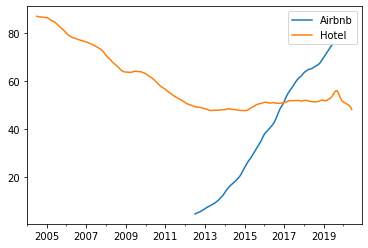

In [43]:
#Get the airbnb trend
result = seasonal_decompose(Y, model='multiplicative', period=12)
airbnb_trend = result.trend

#Get the hotel trend
hotel = pd.read_csv("Hotel.csv",index_col=0)
hotel.index = pd.to_datetime(hotel.index)
result = seasonal_decompose(hotel, model='multiplicative', period=12)
hotel_trend = result.trend

#Combine to compare
trend_comparison = pd.concat([airbnb_trend, hotel_trend], axis=1)
trend_comparison.columns = ['Airbnb', 'Hotel'] 
trend_comparison.plot(kind='line')
plt.show()

Now that we see how the direction of the trends are moving, we could also compare the seasonality present in both. By using this seasonality comparison we can see if the seasonality in airbnb seems to match that of the overall hotel industry or if there are special differences (like if for example it is much stronger in summer when people want a get-away).

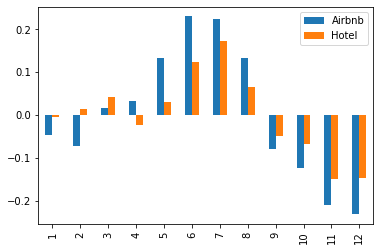

In [44]:
#Get the airbnb trend
result = seasonal_decompose(Y, model='multiplicative', period=12)
airbnb_seasonal = result.seasonal

#Get the hotel trend
hotel = pd.read_csv("Hotel.csv",index_col=0)
hotel.index = pd.to_datetime(hotel.index)
result = seasonal_decompose(hotel, model='multiplicative', period=12)
hotel_seasonal = result.seasonal

#Combine to compare
seasonal_comparison = pd.concat([airbnb_seasonal, hotel_seasonal], axis=1)
seasonal_comparison.columns = ['Airbnb', 'Hotel']

#Take just the one year of data, all others are repeats
seasonal_comparison = seasonal_comparison.loc['2019-01-01':'2019-12-31']

#Subtract 1 to see difference from the mean
seasonal_comparison = seasonal_comparison-1

#Change index to be the month
seasonal_comparison.index = seasonal_comparison.index.month

seasonal_comparison.plot(kind='bar')
plt.show()

# Modeling Growth with Holt Winters

We've shown a few examples thus far of modeling trend and seasonality and in this part we will expand this to include exponential growth and forecasting with our model. Before we dive in, I am going to create dummy data to use. We can think of this data as sales data for a local startup. Don't worry about what is happening in the code below.

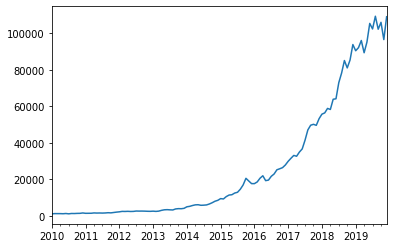

In [45]:
from datetime import datetime

np.random.seed(1)
growth = np.random.normal(.04, .08, 119)
growth = (growth + 1).cumprod()
growth = np.insert(growth, 0, 1)
sales = pd.Series(1000 * growth)
sales.index = pd.date_range(datetime(2010,1,1), datetime(2019,12,31), freq='MS')
sales.plot(kind='line')
plt.show()

## Using a Log Transform

Often we have data that has a pattern of exponential growth. For this type of data, we can use a log transform to turn it into a more linear series of data. 

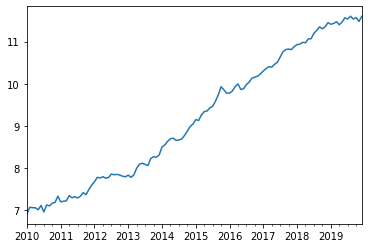

In [46]:
log_sales = np.log(sales)
log_sales.plot(kind='line')
plt.show()

## Holt Linear Trend Model

The holt linear trend model is a useful model to for forecasting. First, we can create and fit the model to our log transformed data, then we will work through what is actually happening with the model.

In [47]:
from statsmodels.tsa.holtwinters import Holt

#Create and fit the model to our log sales values
model = Holt(log_sales).fit()

For the model, there is an attribute fittedvalues which returns the values fit by the model we made.

In [48]:
print(model.fittedvalues)

2010-01-01     6.917900
2010-02-01     6.947951
2010-03-01     7.093511
2010-04-01     7.098411
2010-05-01     7.096797
                ...    
2019-08-01    11.580638
2019-09-01    11.638957
2019-10-01    11.583040
2019-11-01    11.611002
2019-12-01    11.528412
Freq: MS, Length: 120, dtype: float64


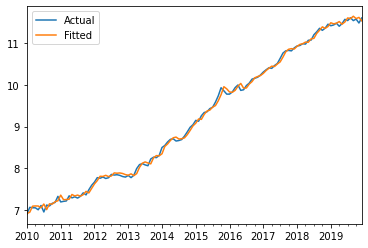

In [49]:
#Plot the actual and fitted values
log_sales.plot(kind='line')
model.fittedvalues.plot(kind='line')
plt.legend(['Actual', 'Fitted'])
plt.show()

Using np.exp() is the opposite of np.log(), it applies $ e^{x} $ to the data where x is each data point. Let's plot the actual sales, and the fittedvalues after applying np.exp().

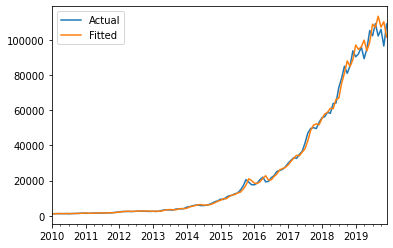

In [50]:
sales.plot(kind='line')
np.exp(model.fittedvalues).plot(kind='line')
plt.legend(['Actual', 'Fitted'])
plt.show()

### Holt Linear Trend Model Equation


The equation for the model is split into three pieces. Below are these pieces.

$ \hat{y_{t+1}} = l_{t} + b_{t}$

$ l_{t+1} = \alpha y_{t+1} + (1-\alpha)(l_{t} + b_{t})$

$ b_{t+1} = \beta (l_{t+1} - l_{t}) + (1-\beta)b_{t}$

where

$ y_{t} = \text{Actual Value at time t} $

$ \hat{y_{t}} = \text{Predicted Value at time t} $

$ l_{t} = \text{Level value at time t} $

$ b_{t} = \text{Trend value at time t} $

$ \alpha = \text{Trend smoothing parameter} $

$ \beta = \text{Level smoothing parameter} $


You can find the parameters in the model from the attribute params.

In [51]:
print(model.params)

{'smoothing_level': 0.9101797580094325, 'smoothing_slope': 0.0, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 6.878615835752972, 'initial_slope': 0.03928418793573401, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


From here we will grab the alpha, beta, initial slope, and initial level.

In [52]:
alpha = model.params['smoothing_level']
beta = model.params['smoothing_slope']
initial_slope = model.params['initial_slope']
initial_level = model.params['initial_level']

We also can create a table to hold all the relevant information that we want to replicate.

In [53]:
table = pd.concat([log_sales, model.level, model.slope, model.fittedvalues], axis=1)
table.columns = ['Actual', 'Level', 'Slope', 'Predicted']
print(table)

               Actual      Level     Slope  Predicted
2010-01-01   6.907755   6.908666  0.039284   6.917900
2010-02-01   7.064714   7.054227  0.039284   6.947951
2010-03-01   7.055734   7.059127  0.039284   7.093511
2010-04-01   7.053477   7.057513  0.039284   7.098411
2010-05-01   7.006556   7.014661  0.039284   7.096797
...               ...        ...       ...        ...
2019-08-01  11.601551  11.599673  0.039284  11.580638
2019-09-01  11.534361  11.543756  0.039284  11.638957
2019-10-01  11.570601  11.571718  0.039284  11.583040
2019-11-01  11.477101  11.489128  0.039284  11.611002
2019-12-01  11.599065  11.592719  0.039284  11.528412

[120 rows x 4 columns]


Let's first predict the values for the first month to check. We have the initial slope and initial level to use in the equation.

In [54]:
#Compute the predicted 
predicted = initial_level + initial_slope
print("Predicted: {}".format(predicted))

#Compute the new level
level = alpha * log_sales.loc['2010-01-01'] + (1-alpha) * (initial_slope + initial_level)
print("Level: {}".format(level))

#Compute the new trend
b = beta * (level - initial_level) + (1-beta) * initial_slope
print("Trend: {}".format(b))

Predicted: 6.917900023688706
Level: 6.908666482406613
Trend: 0.03928418793573401


We notice that we do in fact get the same matching values as before. We can loop through each date to confirm the values of the full table.

In [55]:
#Use a list to keep track of each period
new_table = []

#Initialize the starting values of level and trend
b_prior = initial_slope
level_prior = initial_level

#Loop through all values
for y in log_sales.values:
    #Compute predicted
    predicted = level_prior + b_prior
    
    #Compute the new level
    level = alpha * y + (1-alpha) * (b_prior + level_prior)
    
    #Compute the new trend
    b = beta * (level - level_prior) + (1-beta) * b_prior
    
    #Add all values to the table
    new_table.append([y, level, b, predicted])
    
    #Set the old values to the ones computed
    b_prior = b
    level_prior = level

#Turn it into a dataframe with the matching index and columns
new_table = pd.DataFrame(new_table, index=table.index, columns=table.columns)
print(new_table)

               Actual      Level     Slope  Predicted
2010-01-01   6.907755   6.908666  0.039284   6.917900
2010-02-01   7.064714   7.054227  0.039284   6.947951
2010-03-01   7.055734   7.059127  0.039284   7.093511
2010-04-01   7.053477   7.057513  0.039284   7.098411
2010-05-01   7.006556   7.014661  0.039284   7.096797
...               ...        ...       ...        ...
2019-08-01  11.601551  11.599673  0.039284  11.580638
2019-09-01  11.534361  11.543756  0.039284  11.638957
2019-10-01  11.570601  11.571718  0.039284  11.583040
2019-11-01  11.477101  11.489128  0.039284  11.611002
2019-12-01  11.599065  11.592719  0.039284  11.528412

[120 rows x 4 columns]


We have confirmed that we are able to replicate the model! This is great news. Now, what if we had a non-linear set of data, would this still work? Let's test our model on the version that is not log adjusted and see what happens.

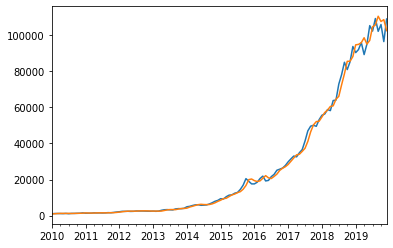

In [56]:
model = Holt(sales).fit()

sales.plot(kind='line')
model.fittedvalues.plot(kind='line')
plt.show()

You will notice that it does in fact still track well to it! You will also notice now that the slope is changing each period because there is no longer a linear slope!

In [57]:
table = pd.concat([sales, model.level, model.slope, model.fittedvalues], axis=1)
table.columns = ['Actual', 'Level', 'Slope', 'Predicted']
print(table)

                   Actual          Level        Slope      Predicted
2010-01-01    1000.000000     978.074327    51.203091     944.735108
2010-02-01    1169.947629    1114.138436    60.213753    1029.277418
2010-03-01    1159.487697    1165.385003    59.261605    1174.352189
2010-04-01    1156.874513    1183.762266    54.920448    1224.646608
2010-05-01    1103.846289    1157.340999    46.283470    1238.682714
...                   ...            ...          ...            ...
2019-08-01  109267.176869  107853.520440  2678.707461  105703.976305
2019-09-01  102166.703656  105485.623519  2142.851913  110532.227901
2019-10-01  105937.100392  106608.132840  2034.510502  107628.475431
2019-11-01   96480.965355  101305.962983  1255.491466  108642.643342
2019-12-01  108995.841014  106443.076507  1667.647554  102561.454449

[120 rows x 4 columns]


### Forecasting

This model can forecast into the future based upon the latest value. The way to do it is to call the forecast on the model and given a number of periods forward which you want to forecast. Below is a forecast for 10 periods ahead.

In [58]:
forecast = model.forecast(10)
print(forecast)

2020-01-01    108110.724061
2020-02-01    109778.371614
2020-03-01    111446.019168
2020-04-01    113113.666722
2020-05-01    114781.314276
2020-06-01    116448.961829
2020-07-01    118116.609383
2020-08-01    119784.256937
2020-09-01    121451.904490
2020-10-01    123119.552044
Freq: MS, dtype: float64


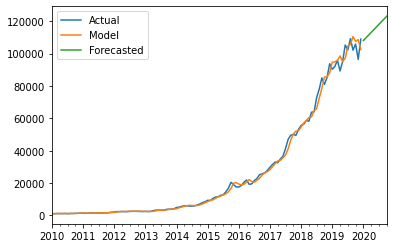

In [59]:
#Plot the forecast with the actual vs. the model
sales.plot(kind='line')
model.fittedvalues.plot(kind='line')
forecast.plot(kind='line')
plt.legend(['Actual', 'Model', 'Forecasted'])
plt.show()

## Validation with Out of Sample Data

It is good practice to validate models with data out of sample. What this means is that we want to hold back a portion of data and test different models against that data to see which one performs the best. Let's split into in-sample and out-of-sample data where we will have the first 9 years be the in-sample and the last year will be the out-of-sample.

In [60]:
#Split the into in_sample and out_sample
in_sample = sales.loc[:'2018-12-31']
out_sample = sales.loc['2019-01-01':]

Let's do two forecasts, one with holt winters, and another that assumes we have 6% growth every month. Then we can plot the two vs. the actual.

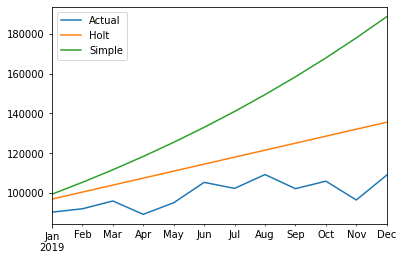

In [61]:
#Fit the model
model = Holt(in_sample).fit()

#Forecast with the model
forecast_model = model.forecast(12)

#Do a simple model
forecast_simple = np.cumprod([1.06]*12) * in_sample.iloc[-1]
forecast_simple = pd.Series(forecast_simple, index=out_sample.index)

out_sample.plot(kind='line')
forecast_model.plot(kind='line')
forecast_simple.plot(kind='line')
plt.legend(['Actual', 'Holt', 'Simple'])
plt.show()

## Mean Squared Error

The mean squared error is a good measure of how similar a forecast is compared to a actual data. The lower the number, the better the forecast performed. The formula is:

$ \frac{1}{N}\sum_{i=1}^{N}(Y_{i} - \hat{Y_{i}})^2$

where

$ N = \text{Number of data points} $

$ Y_{i} = \text{Actual i-th value} $

$ \hat{Y_{i}} = \text{Predicted i-th value} $

In [62]:
MSE1 = ((out_sample - forecast_model) ** 2).sum() / len(out_sample)
MSE2 = ((out_sample - forecast_simple) ** 2).sum() / len(out_sample)

print(MSE1)
print(MSE2)

354320706.44752467
2179517798.195563


Because the first MSE is so much lower we can say that the Holt model performed better (at least in this case). Now let's work with seasonality. The code below will set up our data, don't worry about what is actually happening in it.

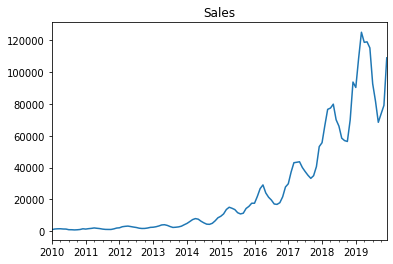

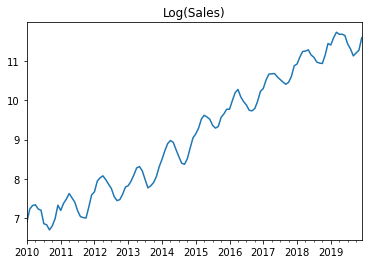

In [63]:
import math

np.random.seed(1)
growth = np.random.normal(.04, .08, 119)
growth = (growth + 1).cumprod()
growth = np.insert(growth, 0, 1)
sales = pd.Series(1000 * growth)

seasonality = np.sin(np.linspace(0, 2 * math.pi, 12))
seasonality = seasonality / 3 + 1
seasonality = np.tile(seasonality, 10)

sales = sales * seasonality
sales.index = pd.date_range(datetime(2010,1,1), datetime(2019,12,31), freq='MS')

ax = sales.plot(kind='line')
plt.title("Sales")
plt.show()

ax = np.log(sales).plot(kind='line')
plt.title("Log(Sales)")
plt.show()

## Holt-Winters

The holt winters model is one that does very well in modeling both trend and seasonality. As we can see from above, there is clearly seasonality within our data which we want to deal with. The holt-winters model can take on many forms in terms of using multiplicative or additive for both the trend or seasonality. Like we did before, we are going to work through using the statsmodels version, but we won't go over the equations or verify them this time since they are a little more involved and depend on whether you use additive or multiplicative. We are going to compare out of sample testing for the different set ups.

First, let's set up just a basic model where both trend and seasonality are multiplicative. 

In [64]:
#Import and fit the model
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(sales, seasonal_periods=12, trend='mul', seasonal='mul').fit()

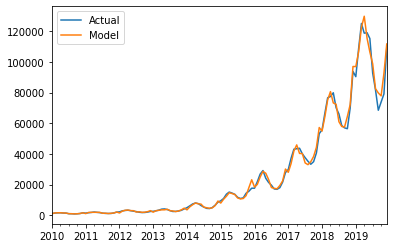

In [65]:
#Plot the model vs. the actual
sales.plot(kind='line')
model.fittedvalues.plot(kind='line')
plt.legend(['Actual', 'Model'])
plt.show()

When we forecast forward we see that the seasonality is preserved. 

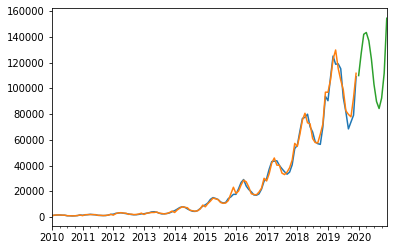

In [66]:
#Forecast a month forward
forecast = model.forecast(12)
sales.plot(kind='line')
model.fittedvalues.plot(kind='line')
forecast.plot(kind='line')

plt.show()

Now let's split into in-sample and out-of-sample and see which performs better.

In [67]:
in_sample = sales.loc[:'2018-12-31']
out_sample = sales.loc['2019-01-01':]

#Build 4 different models
model1 = ExponentialSmoothing(in_sample, seasonal_periods=12, trend='add', seasonal='add').fit()
model2 = ExponentialSmoothing(in_sample, seasonal_periods=12, trend='add', seasonal='mul').fit()
model3 = ExponentialSmoothing(in_sample, seasonal_periods=12, trend='mul', seasonal='add').fit()
model4 = ExponentialSmoothing(in_sample, seasonal_periods=12, trend='mul', seasonal='mul').fit()

/Users/seanmcowen/anaconda/envs/FinanceAndPython/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
/Users/seanmcowen/anaconda/envs/FinanceAndPython/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",
/Users/seanmcowen/anaconda/envs/FinanceAndPython/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [68]:
#Forecast ahead 12 periods with all of our new models
models = [model1, model2, model3, model4]
forecasts = pd.concat([model.forecast(12) for model in models], axis=1)
forecasts.columns = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

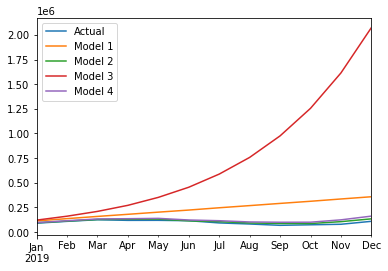

In [69]:
#Plot the results
ax = out_sample.plot(kind='line')
forecasts.plot(kind='line', ax=ax)
plt.legend(['Actual', 'Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.show()

It becomes very obvious quickly that model 1 and 3 are not very close to the correct forecast, so let's zoom in to just see model 2 and 4 vs. the actual.

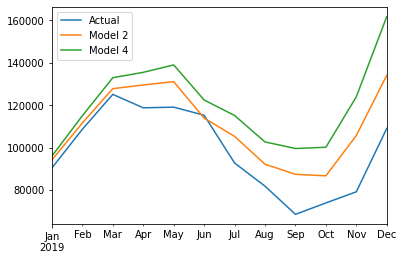

In [70]:
ax = out_sample.plot(kind='line')
forecasts[['Model 2', 'Model 4']].plot(kind='line', ax=ax)
plt.legend(['Actual', 'Model 2', 'Model 4'])
plt.show()

The MSE will confirm just how much of a better fit model 2 and 4 are compared to model 1 and 2. AS well, we will see that within this specific timeframe model 2 looks much better.

In [71]:
MSE = ((forecasts.subtract(out_sample, axis=0)) ** 2).mean()
print(MSE.sort_values())

Model 2    2.011727e+08
Model 4    6.880283e+08
Model 1    2.644744e+10
Model 3    7.780873e+11
dtype: float64


Something to consider with this kind of analysis is how at times it can come down to the luck which models perform better. Let's do this same analysis except this time look up until 2017 for fitting our model, then predict 2018.

In [72]:
in_sample = sales.loc[:'2017-12-31']
out_sample = sales.loc['2018-01-01':'2018-12-31']

#Fit the models
model1 = ExponentialSmoothing(in_sample, seasonal_periods=12, trend='add', seasonal='add').fit()
model2 = ExponentialSmoothing(in_sample, seasonal_periods=12, trend='add', seasonal='mul').fit()
model3 = ExponentialSmoothing(in_sample, seasonal_periods=12, trend='mul', seasonal='add').fit()
model4 = ExponentialSmoothing(in_sample, seasonal_periods=12, trend='mul', seasonal='mul').fit()

/Users/seanmcowen/anaconda/envs/FinanceAndPython/lib/python3.8/site-packages/statsmodels/tsa/holtwinters.py:743: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warn("Optimization failed to converge. Check mle_retvals.",


In [73]:
#Forecast ahead with all models
models = [model1, model2, model3, model4]
forecasts = pd.concat([model.forecast(12) for model in models], axis=1)
forecasts.columns = ['Model 1', 'Model 2', 'Model 3', 'Model 4']

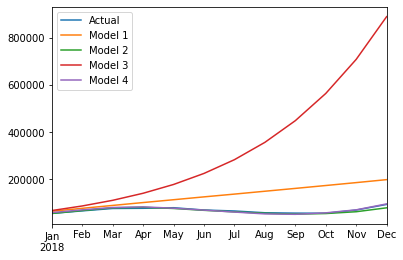

In [74]:
#Plot the models
ax = out_sample.plot(kind='line')
forecasts.plot(kind='line', ax=ax)
plt.legend(['Actual', 'Model 1', 'Model 2', 'Model 3', 'Model 4'])
plt.show()

We confirm what we saw with the last test that model 1 and model 3 are not great fits. What about zooming in again.

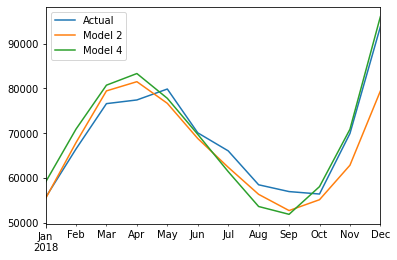

In [75]:
ax = out_sample.plot(kind='line')
forecasts[['Model 2', 'Model 4']].plot(kind='line', ax=ax)
plt.legend(['Actual', 'Model 2', 'Model 4'])

The two are very tight to the actual values which shows they are good candidates still. This time, when we compute the MSE, model 4 is actually the best choice. This just goes to show that there is always randomness present that may change what looks the best or not.

In [76]:
MSE = ((forecasts.subtract(out_sample, axis=0)) ** 2).mean()
print(MSE.sort_values())

Model 4    1.394074e+07
Model 2    2.769388e+07
Model 1    5.667049e+09
Model 3    1.356650e+11
dtype: float64
